# Match or Not Match With Speed Dating Using Binary Classification

<b>Step 1: </b> Import Libraries

In [8]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for data analysis
import pandas as pd
import numpy as np


# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Machine Learning Libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




<b>Step2:</b> Import Data<br>
<b>Step3.1:</b> Dividing data set into 2 sets: one set perople belong to the same race and the second set is the people with the shared interest

In [9]:
# Read in speed Dating Data
dating_data = pd.read_csv('Speed Dating Data.csv',encoding = "ISO-8859-1")
# Printing the first five rows of the Data Frame
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#Printing Quick Description of Data
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


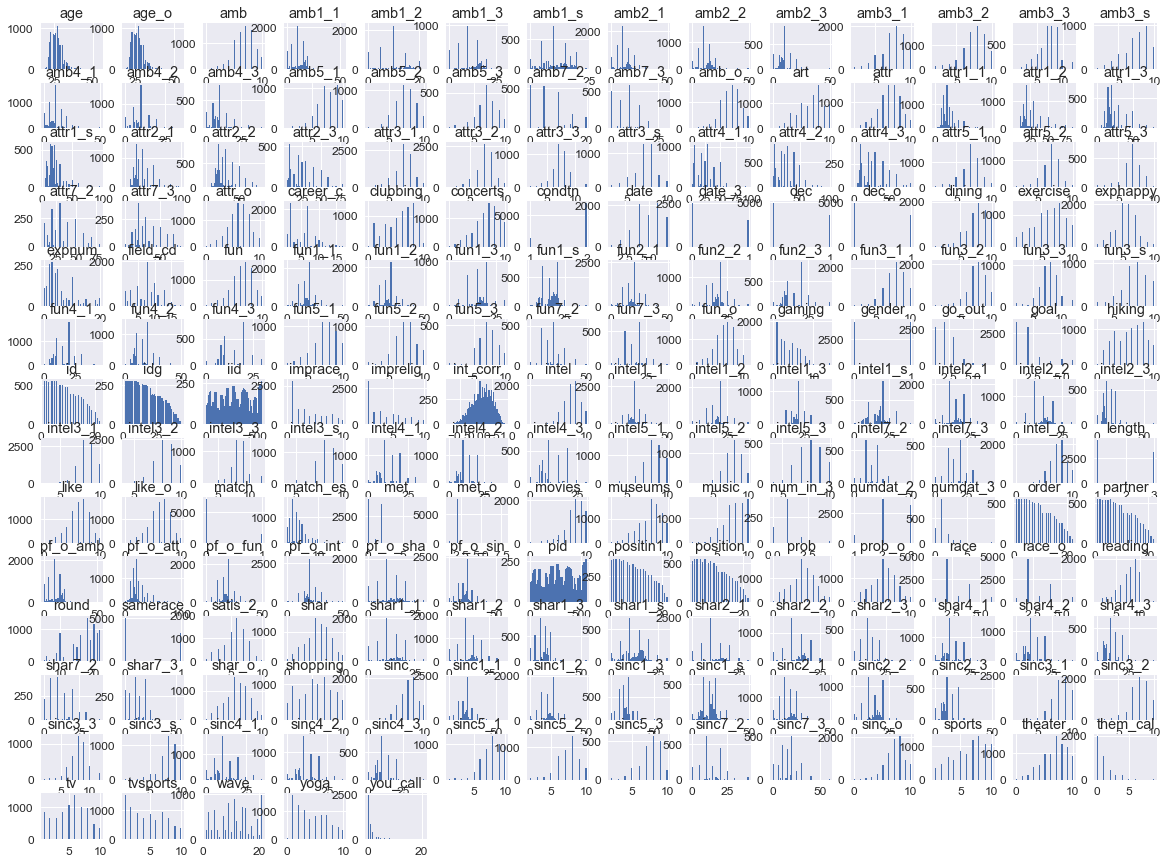

In [4]:
# Calling hist function on numerical attributes
dating_data.hist(bins=50, figsize=(20,15))
plt.show()

<b>Step3: </b> Prepare Data

In [11]:
# Selecting the the columns that need
dating_dataOne = dating_data[['iid','gender','samerace','age_o','race_o','dec_o','race','imprace','career_c']]

In [12]:
dating_dataOne.head()
print"shape of the data frame: " ,dating_dataOne.shape

shape of the data frame:  (8378, 9)


In [13]:
# Looking into the data type of 9 columns that I picked
dating_dataOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 9 columns):
iid         8378 non-null int64
gender      8378 non-null int64
samerace    8378 non-null int64
age_o       8274 non-null float64
race_o      8305 non-null float64
dec_o       8378 non-null int64
race        8315 non-null float64
imprace     8299 non-null float64
career_c    8240 non-null float64
dtypes: float64(5), int64(4)
memory usage: 589.1 KB


In [14]:
# Creating the dataset with the same race people and Replacing NaN with zero 
# Data Cleaning 
dating_dataSetOne=dating_dataOne[dating_dataOne['samerace'] ==1]
dating_dataSetOne = dating_dataSetOne.replace(np.nan,0)


In [15]:
dating_dataSetOne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 2 to 8372
Data columns (total 9 columns):
iid         3316 non-null int64
gender      3316 non-null int64
samerace    3316 non-null int64
age_o       3316 non-null float64
race_o      3316 non-null float64
dec_o       3316 non-null int64
race        3316 non-null float64
imprace     3316 non-null float64
career_c    3316 non-null float64
dtypes: float64(5), int64(4)
memory usage: 259.1 KB


In [16]:
#viewing thedating_dataSetOne.min() maximum values in each nine column
dating_dataSetOne.max()

iid         552.0
gender        1.0
samerace      1.0
age_o        55.0
race_o        6.0
dec_o         1.0
race          6.0
imprace      10.0
career_c     17.0
dtype: float64

In [17]:
# viewing minimum values in each column
dating_dataSetOne.min()

iid         1.0
gender      0.0
samerace    1.0
age_o       0.0
race_o      1.0
dec_o       0.0
race        1.0
imprace     0.0
career_c    0.0
dtype: float64

In [18]:
 # Replacing the age with value zero to the mean of the age
mean_age=dating_dataSetOne['age_o'].mean()
dating_dataSetOne['age_o']=dating_dataSetOne.age_o.mask(dating_dataSetOne.age_o == 0,mean_age)

In [19]:
# Now printing the min value for each column again.
dating_dataSetOne.min()

iid          1.0
gender       0.0
samerace     1.0
age_o       20.0
race_o       1.0
dec_o        0.0
race         1.0
imprace      0.0
career_c     0.0
dtype: float64

In [20]:
# creating age bins
bins = [18, 21, 55]
# Create names for the three groups
group_names = ['Young', 'Old']
# Copying the data frame into another one for visualization purpose
dating_data_visual = dating_dataSetOne.copy(deep=True)
# Cut age and add ageBinned column
categories = pd.cut(dating_data_visual['age_o'], bins, labels=group_names)

dating_data_visual['categories'] = pd.cut(dating_dataSetOne['age_o'], bins, labels=group_names)
dating_data_visual['scoresBinned'] = pd.cut(dating_dataSetOne['age_o'], bins)



In [31]:
#viewing the data frame for the visualization purpose
dating_data_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 2 to 8372
Data columns (total 11 columns):
iid             3316 non-null int64
gender          3316 non-null int64
samerace        3316 non-null int64
age_o           3316 non-null float64
race_o          3316 non-null float64
dec_o           3316 non-null int64
race            3316 non-null float64
imprace         3316 non-null float64
career_c        3316 non-null float64
categories      3316 non-null category
scoresBinned    3316 non-null category
dtypes: category(2), float64(5), int64(4)
memory usage: 265.6 KB


In [21]:
# Viewing the first five records
dating_data_visual.head()

,iid,gender,samerace,age_o,race_o,dec_o,race,imprace,career_c,categories,scoresBinned
2,1,0,1,22.0,4.0,1,4.0,2.0,0.0,Old,"(21, 55]"
10,2,0,1,27.0,2.0,0,2.0,2.0,0.0,Old,"(21, 55]"
11,2,0,1,22.0,2.0,0,2.0,2.0,0.0,Old,"(21, 55]"
13,2,0,1,23.0,2.0,1,2.0,2.0,0.0,Old,"(21, 55]"
15,2,0,1,25.0,2.0,1,2.0,2.0,0.0,Old,"(21, 55]"


In [22]:
# Count the number of observations which each value
x_values=pd.value_counts(dating_data_visual['categories'])
x_values


Old      3174
Young     142
Name: categories, dtype: int64

In [23]:
f_adult_count=pd.value_counts((dating_data_visual['categories']=='Old') & (dating_data_visual['gender']==0))
f_adult_count

False    1714
True     1602
dtype: int64

In [24]:
m_adult_count=pd.value_counts((dating_data_visual['categories']=='Old') & (dating_data_visual['gender']==1))
m_adult_count



False    1744
True     1572
dtype: int64

In [25]:
f_young_count=pd.value_counts((dating_data_visual['categories']=='Young') & (dating_data_visual['gender']==0))
f_young_count

False    3260
True       56
dtype: int64

In [26]:
m_young_count=pd.value_counts((dating_data_visual['categories']=='Young') & (dating_data_visual['gender']==1))
m_young_count

False    3230
True       86
dtype: int64

In [27]:
f_young_df=dating_data_visual[(dating_data_visual['categories'] =='Young') & (dating_data_visual['gender']==0)]


f_young_mean=f_young_df.imprace.mean()
print f_young_mean

4.58928571429


In [28]:
m_young_df=dating_data_visual[(dating_data_visual['categories'] =='Young') & (dating_data_visual['gender']==1)]
m_young_impra_mean=m_young_df.imprace.mean()

In [29]:
f_adult_df=dating_data_visual[(dating_data_visual['categories'] =='Old') & (dating_data_visual['gender']==0)]
f_adu_impra_mean=f_adult_df.imprace.mean()

In [30]:
m_adult_df=dating_data_visual[(dating_data_visual['categories'] =='Old') & (dating_data_visual['gender']==1)]
m_adu_impra_mean=m_adult_df.imprace.mean()

In [31]:
y = f_adult_count[0]
x = f_adult_count[1]
print f_adult_count

False    1714
True     1602
dtype: int64


In [32]:
print(x, y)

(1602, 1714)


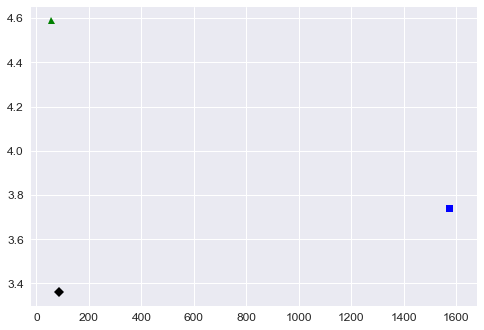

In [33]:
plt.plot(f_adult_count[1], f_adu_impra_mean, 'r--',m_adult_count[1], m_adu_impra_mean, 'bs', f_young_count[1], f_young_mean, 'g^',m_young_count[1],m_young_impra_mean,'kD')
plt.show()


In [34]:

list(dating_dataSetOne.groupby('imprace').count().reset_index()[['imprace','iid']]['iid'])

[16, 991, 366, 355, 223, 291, 201, 224, 323, 194, 132]

In [35]:
dating_dataSetOne.columns

Index([u'iid', u'gender', u'samerace', u'age_o', u'race_o', u'dec_o', u'race',
       u'imprace', u'career_c'],
      dtype='object')

In [36]:
# Making all the fields into object except iid
for i in ['gender','imprace','samerace','age_o','race_o','dec_o','career_c','race']:
    dating_dataSetOne[i] = dating_dataSetOne[i].astype(str)

In [37]:
dating_dataSetOne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 2 to 8372
Data columns (total 9 columns):
iid         3316 non-null int64
gender      3316 non-null object
samerace    3316 non-null object
age_o       3316 non-null object
race_o      3316 non-null object
dec_o       3316 non-null object
race        3316 non-null object
imprace     3316 non-null object
career_c    3316 non-null object
dtypes: int64(1), object(8)
memory usage: 259.1+ KB


In [38]:
dating_dataSetOne=pd.get_dummies(dating_dataSetOne, columns = ['gender', 'age_o', 'race_o', 'race', ])


In [39]:
train, test = train_test_split(dating_dataSetOne, test_size=0.2)

In [40]:
ids = train['iid']
train_y = train['dec_o']
train_x = train.drop(['iid', 'dec_o'], 1)
test_ids=test['iid']
test_y=test['dec_o']
test_x=test.drop(['iid','dec_o'],1)

In [41]:
clf = tree.DecisionTreeClassifier()

In [42]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
pred_y = clf.predict(test_x)

In [44]:
pred_y

array(['1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0

In [45]:
print "Accuracy is ", accuracy_score(test_y,pred_y)*100

print classification_report(test_y,pred_y)

Accuracy is  54.6686746988
             precision    recall  f1-score   support

          0       0.57      0.71      0.63       361
          1       0.50      0.36      0.42       303

avg / total       0.54      0.55      0.53       664

